In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np

nba = pd.read_csv('stats/Seasons_Stats.csv')

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


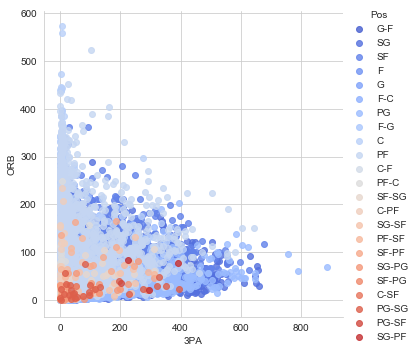

In [3]:
sns.set_style('whitegrid')
sns.lmplot('3PA','ORB',data=nba, hue = 'Pos', palette='coolwarm',size=5,aspect=1,fit_reg=False)

In [6]:
full_nba = nba[['Pos', '3P', 'ORB']]
nba = nba[['3P', 'ORB']]
nba = nba.dropna()
full_nba = full_nba.dropna()
full_nba

,Pos,3P,ORB
5727,C,0.0,190.0
5728,PF,0.0,62.0
5729,C,0.0,158.0
5730,PG,4.0,59.0
5731,C,0.0,29.0
5732,SG,1.0,6.0
5733,PF,0.0,71.0
5734,SF,16.0,240.0
5735,SF,1.0,192.0
5736,PF,0.0,34.0


In [8]:
count = 0
for row in full_nba['Pos']:
    if row == 'PG-SG' or row == 'PG-SF':
        row = 'PG'
    if row =='SG-PG' or row == 'SG-SF' or row == 'SG-PF':
        row = 'SG'
    if row == 'SF-PF' or row =='SF-SG' or row == 'F-G' or row == 'SF-PG':
        row = 'SF'
    if row == 'PF-SF' or row == 'PF-C':
        row = 'PF'
    if row == 'C-PF' or row == 'C-SF' or row == 'C-F':
        row = 'C'
    full_nba.at[count, 'Pos'] = row
    count+=1
full_nba = full_nba.dropna()

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(nba)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
np_nba = nba.values
labels = []
for row in np_nba:
    vals = row.reshape(1, -1)
    label = kmeans.predict(vals)
    label = label[0]
    if len(labels) < 18926:
        labels.append(label)
print(len(labels))
print(len(full_nba))
full_nba['labels'] = labels


18926
18926


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
cols = ['clus', 'error']
clus = {'num':[], 'error':[]}

for clusters in range(15):
    if clusters >0:
        kmeans = KMeans(n_clusters=clusters)
        kmeans.fit(nba)
        clus['num'].append(clusters)
        clus['error'].append(kmeans.inertia_)

df = pd.DataFrame.from_dict(clus)

,num,error
0,1,1.104127e+08
1,2,5.234101e+07
2,3,3.220341e+07
3,4,2.119204e+07
4,5,1.681646e+07
5,6,1.357100e+07
6,7,1.151107e+07
7,8,9.788125e+06
8,9,8.646750e+06
9,10,7.596911e+06


/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


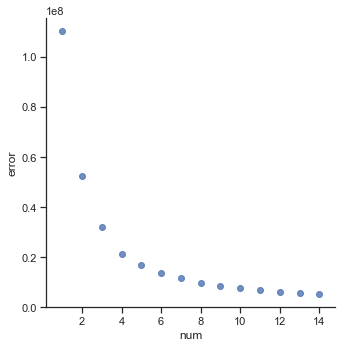

In [24]:
sns.set(style="ticks")
sns.lmplot('num', 'error', data = df, palette='coolwarm',size=5,aspect=1,fit_reg=False)

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


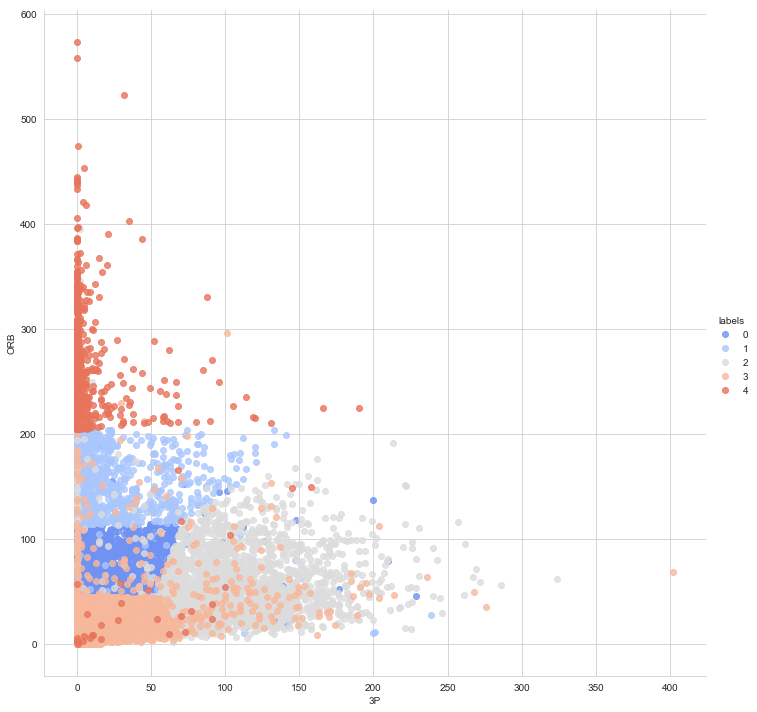

In [14]:
sns.set_style('whitegrid')
sns.lmplot('3P','ORB',data=full_nba,hue='labels', palette='coolwarm',size=10,aspect=1,fit_reg=False)

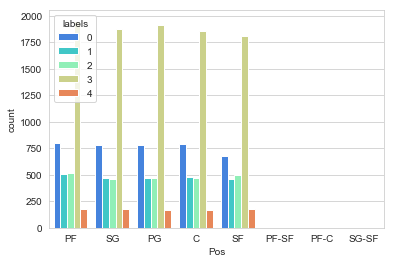

In [16]:
sns.countplot(x='Pos', hue='labels',palette='rainbow', data=full_nba)

With this K Means Cluster, I tried to determine a NBA player's position based on their 3 Pointers Attempted and their Offensive Rebounds. The graph is very inconclusive  because almost all of the levels are equal across all 5 positions. Also, the vast majority of players are in category 3 because most players have low 3P and low ORB. In  retrospect, if I had done 3P% and ORB% (if that's even a thing), I would have gotten better results because it would have had more to do with position and less to do with playing time.
Lastly, I had predicted that there wouldn't be as much of a difference as the NFL combine data because NBA positions
are much more fluid.

I'm going to try again below with BPM and 3P% instead of ORB and 3P.

In [21]:
nba2 = pd.read_csv('stats/Seasons_Stats.csv')
nba2.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [27]:
full_nba2 = nba2[['Pos', '3P%', 'BPM']]
nba2 = nba2[['3P%', 'BPM']]
nba2 = nba2.dropna()
full_nba2 = full_nba2.dropna()
full_nba2

,Pos,3P%,BPM
5727,C,0.000,6.7
5728,PF,0.000,-1.6
5729,C,0.000,4.4
5730,PG,0.222,0.0
5732,SG,1.000,-2.4
5734,SF,0.340,2.5
5735,SF,0.333,0.3
5737,SF,0.330,0.6
5741,SG,0.421,3.3
5743,C,0.200,0.5


In [29]:
count = 0
for row in full_nba2['Pos']:
    if row == 'PG-SG' or row == 'PG-SF':
        row = 'PG'
    if row =='SG-PG' or row == 'SG-SF' or row == 'SG-PF':
        row = 'SG'
    if row == 'SF-PF' or row =='SF-SG' or row == 'F-G' or row == 'SF-PG':
        row = 'SF'
    if row == 'PF-SF' or row == 'PF-C':
        row = 'PF'
    if row == 'C-PF' or row == 'C-SF' or row == 'C-F':
        row = 'C'
    full_nba2.at[count, 'Pos'] = row
    count+=1
full_nba2 = full_nba2.dropna()
full_nba2

,Pos,3P%,BPM
5727,SF,0.000,6.7
5728,SF,0.000,-1.6
5729,SF,0.000,4.4
5730,SG,0.222,0.0
5732,PF,1.000,-2.4
5734,C,0.340,2.5
5735,PF,0.333,0.3
5737,SG,0.330,0.6
5741,PG,0.421,3.3
5743,SF,0.200,0.5


In [39]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(nba2)
kmeans2.cluster_centers_

array([[  0.26340771,   0.06445912],
       [  0.24390444,  -2.94478528],
       [  0.21190028,  -6.72963653],
       [  0.28226925,   3.79255159],
       [  0.10683775, -15.30198675]])

In [40]:
np_nba2 = nba2.values
labels2 = []
for row in np_nba2:
    vals = row.reshape(1, -1)
    label = kmeans2.predict(vals)
    label = label[0]
    if len(labels2) < 15415:
        labels2.append(label)
print(len(labels2))
print(len(full_nba2))
full_nba2['labels2'] = labels2

15415
15415


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [44]:
full_nba2.drop(['labels'], axis=1)

,Pos,3P%,BPM,labels2
5727,SF,0.000,6.7,3
5728,SF,0.000,-1.6,1
5729,SF,0.000,4.4,3
5730,SG,0.222,0.0,0
5732,PF,1.000,-2.4,1
5734,C,0.340,2.5,3
5735,PF,0.333,0.3,0
5737,SG,0.330,0.6,0
5741,PG,0.421,3.3,3
5743,SF,0.200,0.5,0


/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


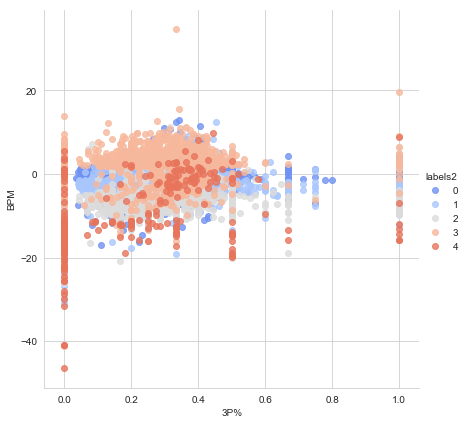

In [45]:
sns.set_style('whitegrid')
sns.lmplot('3P%','BPM',data=full_nba2,hue='labels2', palette='coolwarm',size=6,aspect=1,fit_reg=False)

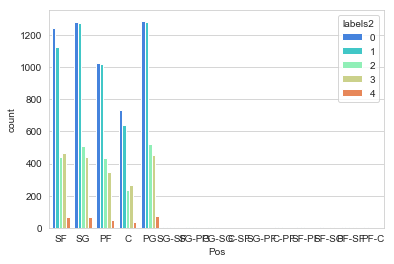

In [46]:
sns.countplot(x='Pos', hue='labels2',palette='rainbow', data=full_nba2)

Interestingly, this graph doesn't show very much info either. It might be because some of the data is skewed (why are there BPMs below 0?), or because there is no relationship. Also, a fair number of players have 1.0 3p%, which is clearly unrealistic. Maybe they have played very little?